In [1]:
import numpy as np
import pandas as pd
import root_numpy as rn
import matplotlib.pyplot as plt

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [8]:
f = rn.root2array('quality_ana.root',treename='vtx_tree')
df = pd.DataFrame(f)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df['diff_x'] = df['mc_vtx_x'] - df['reco_vtx_x']
df['diff_y'] = df['mc_vtx_y'] - df['reco_vtx_y']
df['diff_z'] = df['mc_vtx_z'] - df['reco_vtx_z']

df['shr1_diff_x'] = df['mc_shr1_st_x'] - df['reco_shr1_st_x']
df['shr1_diff_y'] = df['mc_shr1_st_y'] - df['reco_shr1_st_y']
df['shr1_diff_z'] = df['mc_shr1_st_z'] - df['reco_shr1_st_z']
df['shr1_diff_e'] = df['mc_shr1_e'] - df['reco_shr1_e']

df['shr2_diff_x'] = df['mc_shr2_st_x'] - df['reco_shr2_st_x']
df['shr2_diff_y'] = df['mc_shr2_st_y'] - df['reco_shr2_st_y']
df['shr2_diff_z'] = df['mc_shr2_st_z'] - df['reco_shr2_st_z']
df['shr2_diff_e'] = df['mc_shr2_e'] - df['reco_shr2_e']

df.head()

,vtx_diff,mc_vtx_x,mc_vtx_y,mc_vtx_z,reco_vtx_x,reco_vtx_y,reco_vtx_z,trk_st_diff,reco_trk_st_x,reco_trk_st_y,...,diff_y,diff_z,shr1_diff_x,shr1_diff_y,shr1_diff_z,shr1_diff_e,shr2_diff_x,shr2_diff_y,shr2_diff_z,shr2_diff_e
0,1.544,74.914,-35.474,270.083,74.519,-33.988,270.225,1.544,74.519,-33.988,...,-1.486,-0.143,-0.050,0.033,-0.005,93.934,-0.123,0.205,0.048,55.963
1,3.786,233.081,-28.388,236.044,232.324,-27.464,239.636,3.786,232.324,-27.464,...,-0.925,-3.592,-0.109,-3.125,9.079,150.583,0.109,2.933,26.703,12.338
2,0.914,164.198,-12.460,326.063,163.911,-12.537,326.928,0.914,163.911,-12.537,...,0.077,-0.865,-4.280,15.658,-0.087,15.295,0.766,1.661,0.088,31.481
3,1.700,128.315,-58.879,549.582,128.078,-59.686,551.059,1.700,128.078,-59.686,...,0.808,-1.477,-0.365,0.211,0.120,39.042,-0.846,5.569,-0.015,5.500
4,2.229,195.506,-37.080,392.618,195.851,-36.529,394.750,3.349,196.696,-35.046,...,-0.551,-2.132,17.856,-29.920,9.499,106.703,1.305,-2.455,0.786,-3.715


In [9]:
a = df.query('trk_dot > 0.8')
a = df.query('vtx_diff < 10')
print a.shape

a = df.query('shr2_st_diff < 20 and shr1_st_diff < 20')
print a.shape

(315, 49)
(239, 49)


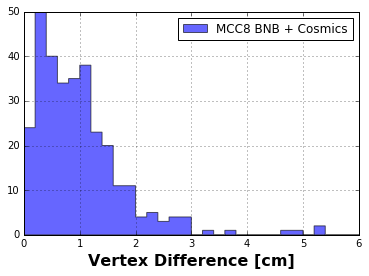

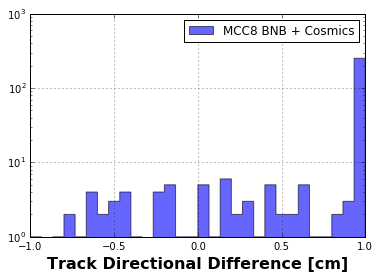

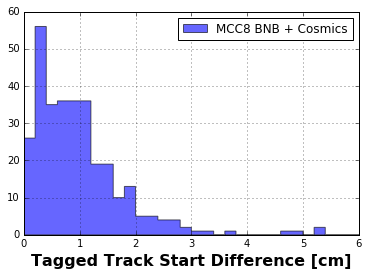

In [10]:
_,_,_ = plt.hist(df.vtx_diff.values,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Difference [cm]',fontsize=16,weight='bold')
plt.legend()

plt.figure()
_,_,_ = plt.hist(df.trk_dot.values,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(-1,1))
plt.grid(True)
plt.xlabel('Track Directional Difference [cm]',fontsize=16,weight='bold')
plt.legend()
plt.yscale('log')

plt.figure()
_,_,_ = plt.hist(df.trk_st_diff.values,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Tagged Track Start Difference [cm]',fontsize=16,weight='bold')
plt.legend()
#plt.yscale('log')

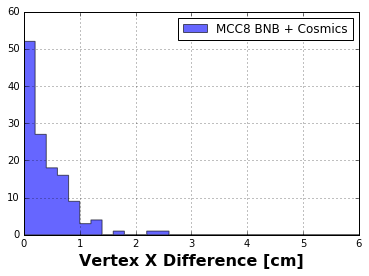

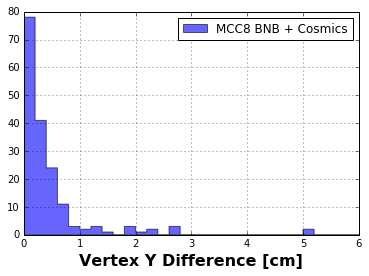

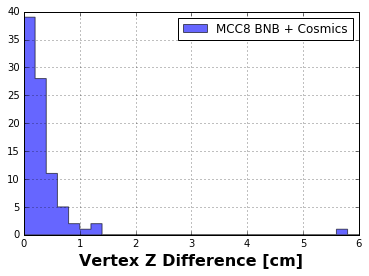

In [11]:
_,_,_ = plt.hist(df.diff_x,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex X Difference [cm]',fontsize=16,weight='bold')
plt.legend()

plt.figure()
_,_,_ = plt.hist(df.diff_y,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Y Difference [cm]',fontsize=16,weight='bold')
plt.legend()

plt.figure()
_,_,_ = plt.hist(df.diff_z,bins=30,label='MCC8 BNB + Cosmics',color='b',histtype='stepfilled',\
         alpha=0.6,range=(0,6))
plt.grid(True)
plt.xlabel('Vertex Z Difference [cm]',fontsize=16,weight='bold')
plt.legend()


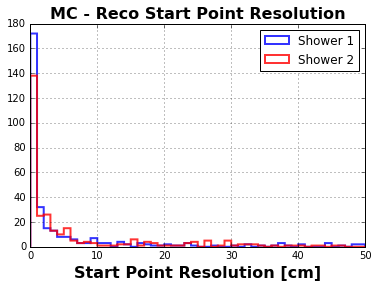

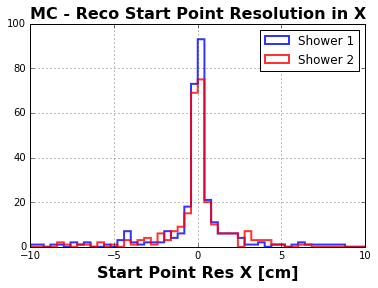

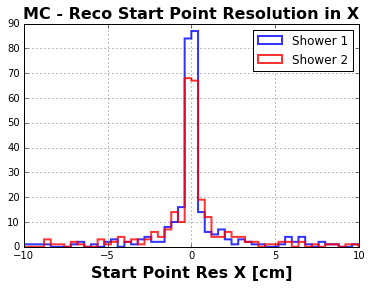

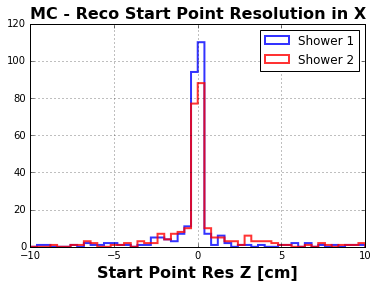

In [12]:
# The corresponding ana module has correction for space charge included
nbins = 50

_,_,_ = plt.hist(df.shr1_st_diff,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(0,50))
_,_,_ = plt.hist(df.shr2_st_diff,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(0,50))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution',fontsize=16,weight='bold')
plt.xlabel('Start Point Resolution [cm]',fontsize=16,weight='bold')
plt.legend()
#plt.yscale('log')

plt.figure()
_,_,_ = plt.hist(df.shr1_diff_x,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_x,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in X',fontsize=16,weight='bold')
plt.xlabel('Start Point Res X [cm]',fontsize=16,weight='bold')
plt.legend()

plt.figure()
_,_,_ = plt.hist(df.shr1_diff_y,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_y,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in X',fontsize=16,weight='bold')
plt.xlabel('Start Point Res X [cm]',fontsize=16,weight='bold')
plt.legend()

plt.figure()
_,_,_ = plt.hist(df.shr1_diff_z,bins=nbins,color='b',histtype='step',label='Shower 1',lw=2,alpha=0.8,range=(-10,10))
_,_,_ = plt.hist(df.shr2_diff_z,bins=nbins,color='r',histtype='step',label='Shower 2',lw=2,alpha=0.8,range=(-10,10))
plt.grid(True)
plt.title('MC - Reco Start Point Resolution in X',fontsize=16,weight='bold')
plt.xlabel('Start Point Res Z [cm]',fontsize=16,weight='bold')
plt.legend()

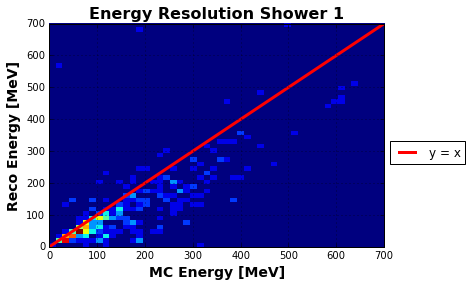

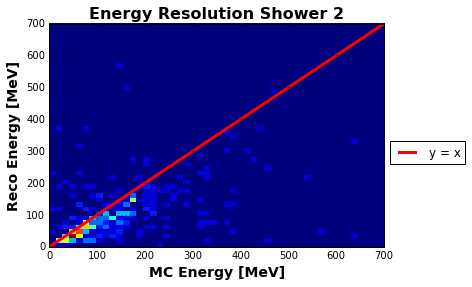

In [27]:
nbins = 50
x = np.linspace(0,700,50)

plt.hist2d(df.mc_shr1_e.values,df.reco_shr1_e.values,bins=nbins,range=[(0,700),(0,700)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 1',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))

plt.figure()
plt.hist2d(df.mc_shr2_e.values,df.reco_shr2_e.values,bins=nbins,range=[(0,700),(0,700)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 2',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))

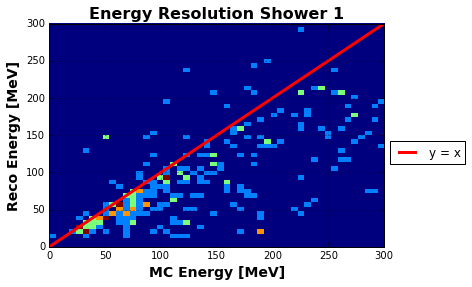

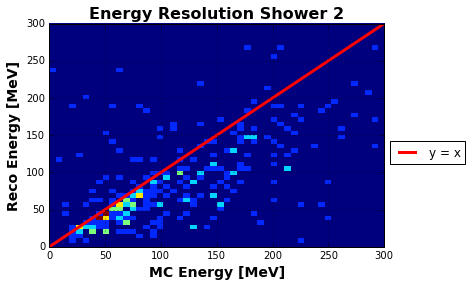

In [28]:
#ZOOM IN
nbins = 50
x = np.linspace(0,300,50)

plt.hist2d(df.mc_shr1_e.values,df.reco_shr1_e.values,bins=nbins,range=[(0,300),(0,300)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 1',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))

plt.figure()
plt.hist2d(df.mc_shr2_e.values,df.reco_shr2_e.values,bins=nbins,range=[(0,300),(0,300)])
plt.plot(x,x,lw=3,color='r',label='y = x')
plt.grid(True)
plt.title('Energy Resolution Shower 2',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))